In [ ]:
import tensorflow as tf

tf.version.VERSION

'2.7.0'

In [ ]:
# Create own data
from sklearn.datasets import make_circles

# Make 1200 examples
n_samples = 1200

# Create circles
# Produces Gaussian data
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X.shape, y.shape

((1200, 2), (1200,))

In [ ]:
X[:10], y[:10]

(array([[ 0.77436678, -0.16684775],
        [-0.72186762,  0.24689819],
        [ 0.48004702,  0.86912612],
        [-0.10037767, -1.01655278],
        [ 0.81847257,  0.57161308],
        [ 0.51417038, -0.61636531],
        [-0.96817191, -0.24244381],
        [-0.55656382, -0.59132843],
        [-0.40766834, -0.92463111],
        [-0.6883893 ,  0.33497999]]), array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1]))

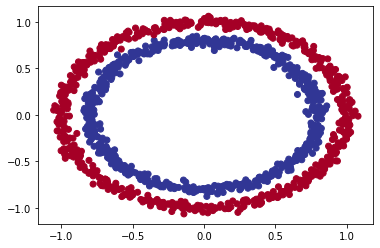

In [ ]:
# Visualize data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

I need a model which would distinguish blue circle from red one.

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.774367,-0.166848,1
1,-0.721868,0.246898,1
2,0.480047,0.869126,0
3,-0.100378,-1.016553,0
4,0.818473,0.571613,0


In [ ]:
# Check out the different labels
circles.label.value_counts()

1    600
0    600
Name: label, dtype: int64

It is an example of binary classification problem
# Modeling

1.   **Create a model** - piece together the layers of a neural network yourself
2.   **Compile a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer)
3.   **Fit a model** - letting the model try to find patterns in the data (how does X get to y)


In [ ]:
# Build a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])

history = model.fit(X, y, epochs=5)

Epoch 1/5
38/38 [==============================] - 1s 3ms/step - loss: 4.1508 - accuracy: 0.4642
Epoch 2/5
38/38 [==============================] - 0s 3ms/step - loss: 3.8935 - accuracy: 0.4642
Epoch 3/5
38/38 [==============================] - 0s 3ms/step - loss: 3.7043 - accuracy: 0.4667
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 3.3502 - accuracy: 0.4725
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 2.8686 - accuracy: 0.4750


In [ ]:
history.history

{'accuracy': [0.46416667103767395,
  0.46416667103767395,
  0.46666666865348816,
  0.4724999964237213,
  0.4749999940395355],
 'loss': [4.150752544403076,
  3.893458604812622,
  3.704261064529419,
  3.3502085208892822,
  2.868640184402466]}

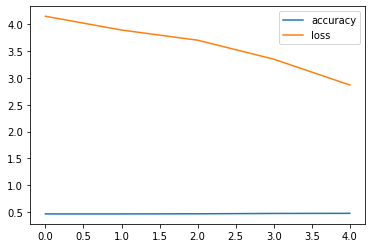

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

38/38 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4808


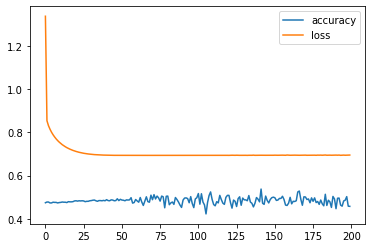

In [ ]:
# Train our model for longer (more chances to look at the data)
history_2 = model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X, y)

plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['loss'], label='loss')
plt.legend()
plt.show()

doing binary classifcation...


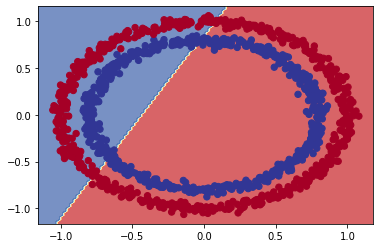

In [ ]:
# Visualize a model performance

import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model, X, y)

# Improving the model

1.   **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2.   **Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3.   **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer)



38/38 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
[0.014181272126734257, 1.0]


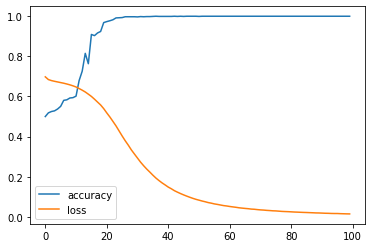

doing binary classifcation...


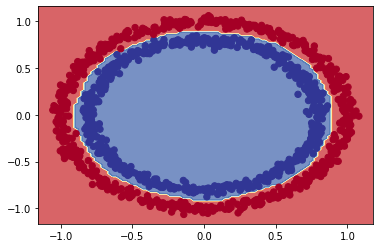

In [ ]:
# Build a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=0)

results = model.evaluate(X, y)
print(results)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

plot_decision_boundary(model, X, y)

# Improving the model

Addint Train/Test Data

In [ ]:
len(X), len(y)

(1200, 1200)

In [ ]:
X.shape

(1200, 2)

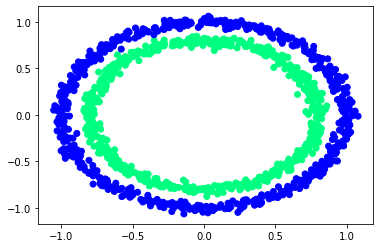

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

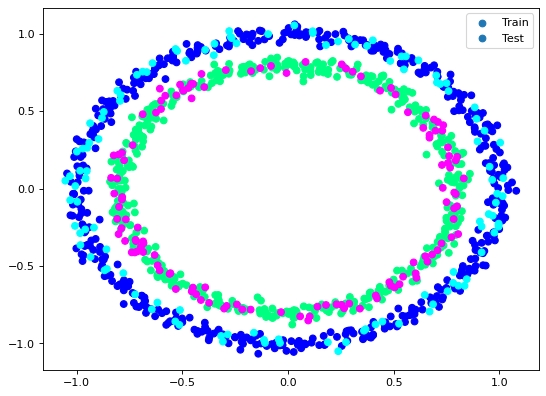

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="cool", label="Test")
plt.legend()
plt.show()

In [ ]:
X_train.shape, X_test.shape

((960, 2), (240, 2))

8/8 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9958


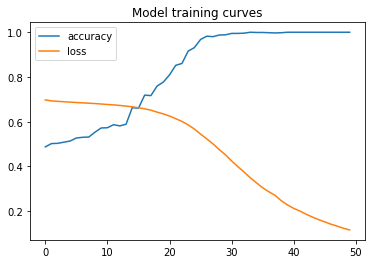

doing binary classifcation...
Model loss on the test set: 0.1275322437286377
Model accuracy on the test set: 99.58%


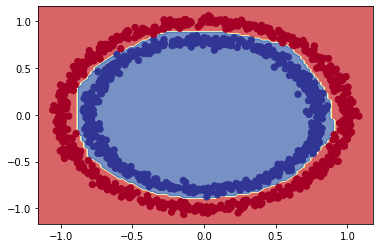

In [ ]:
tf.random.set_seed(43)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)

plt.title("Model training curves")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

plot_decision_boundary(model, X, y)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

doing binary classifcation...
doing binary classifcation...


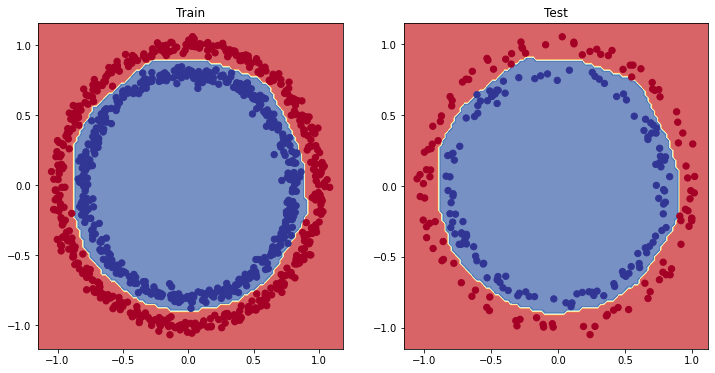

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.697176,0.487500
1,0.693137,0.502083
2,0.691155,0.503125
3,0.689091,0.508333
4,0.687599,0.513542
5,0.685690,0.527083
6,0.684236,0.530208
7,0.682771,0.531250
8,0.681059,0.553125
9,0.679041,0.571875


# Finding the best learning rate!
To do so we can use **callback** function which will change learning rate before each epoch. 

So the **callback** function is the function which is called right before epoch. It can change the learning rate for optimizer using the rule that you set. It will give you statistics, data from which you can find the best learning rate. I will dive deeper in in right now

That's an important thing to understand about machine learning and deep learning in general. **It's very experimental**. You build a model and evaluate it, build a model and evaluate it.

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Learning rate starts from 0.0001 and rises as * 10^(1/20)
callback_lrn = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)

history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[callback_lrn])

Epoch 1/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4917 - lr: 1.0000e-04
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4948 - lr: 1.2589e-04
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4958 - lr: 1.4125e-04
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.4969 - lr: 1.5849e-04
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5021 - lr: 1.7783e-04
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss:

In [ ]:
pd.DataFrame(history_1.history)

,loss,accuracy,lr
0,0.694179,0.491667,0.000100
1,0.693361,0.493750,0.000112
2,0.692660,0.494792,0.000126
3,0.691680,0.495833,0.000141
4,0.690829,0.496875,0.000158
...,...,...,...
95,0.752454,0.512500,5.623413
96,0.758616,0.520833,6.309574
97,0.729505,0.525000,7.079458
98,0.731119,0.504167,7.943282


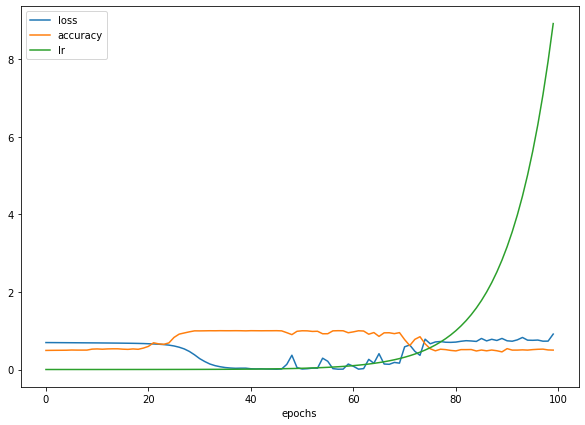

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7), xlabel="epochs")
plt.show()

The area, where loss starts decreasing rapidly is the area of optimal learning rate values!

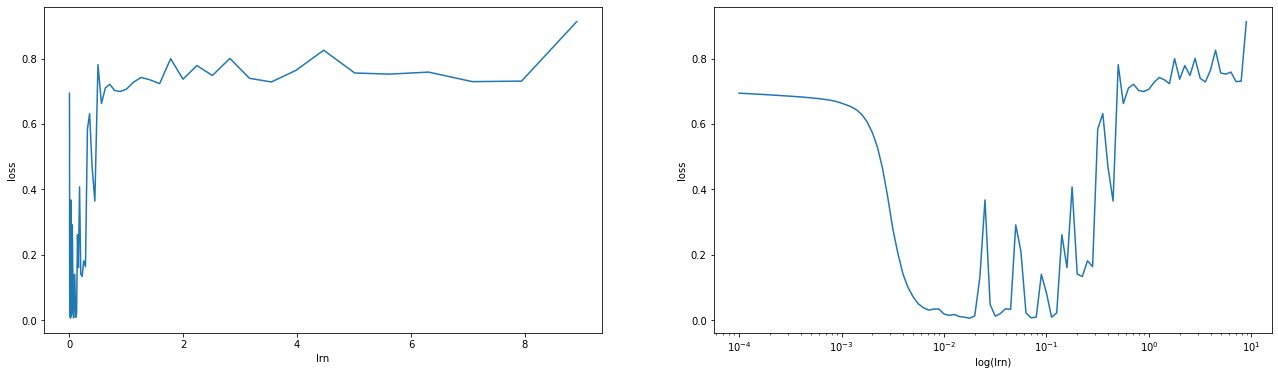

In [ ]:
lrn = 1e-4 * 10**(tf.range(100)/20)

plt.figure(figsize=(22, 6))
plt.subplot(1,2,1)
plt.plot(lrn, history_1.history["loss"])
plt.xlabel("lrn")
plt.ylabel("loss")

plt.subplot(1,2,2)
plt.plot(lrn, history_1.history["loss"])
plt.xscale("log")
plt.xlabel("log(lrn)")
plt.ylabel("loss")
plt.show()

In [ ]:
import numpy as np

min_epochs = np.argmin(history_1.history["loss"])
l_max = lrn[min_epochs]
print(f"Learning rate which corresponds to minimum loss: {l_max:.6f}")
print(f"Epoch when the minimum of loss has been found: {min_epochs}")

Learning rate which corresponds to minimum loss: 0.017783
Epoch when the minimum of loss has been found: 45


The lowest point is for learning rate = 0.0177
There is a rule that you can easily choose the rate 10 times smaller and it will be optimal. But at the same time you can just look at the plot and choose the rate which is lower than 0.0177, dropped but not completely flattened. It means you should choose number around the edge of the drop

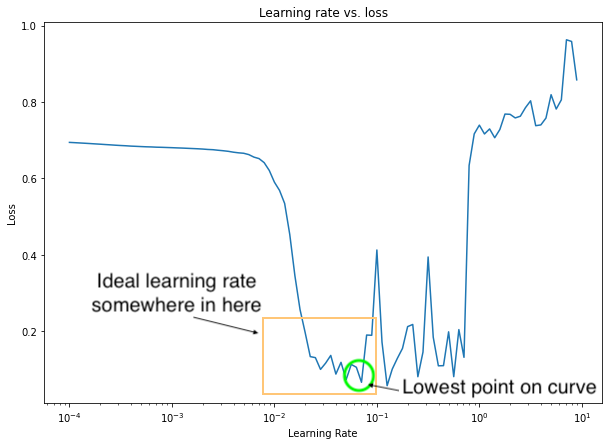

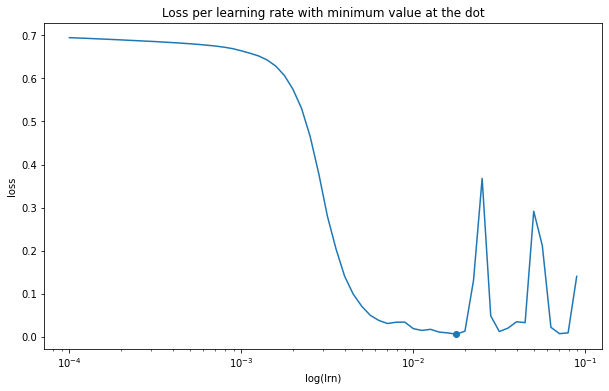

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lrn[:min_epochs+15], history_1.history["loss"][:min_epochs+15])
plt.scatter(lrn[min_epochs], history_1.history["loss"][min_epochs])
plt.xscale("log")
plt.xlabel("log(lrn)")
plt.ylabel("loss")
plt.title("Loss per learning rate with minimum value at the dot")
plt.show()

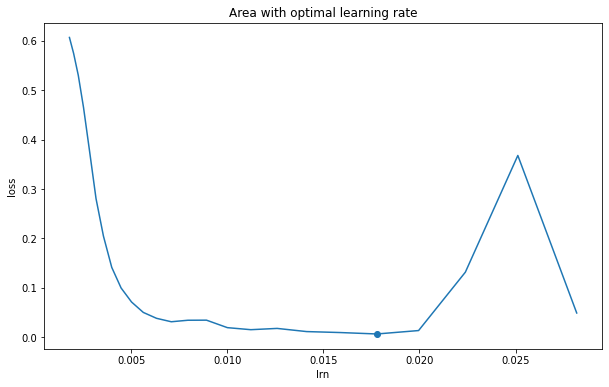

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lrn[min_epochs-20:min_epochs+5], 
         history_1.history["loss"][min_epochs-20:min_epochs+5])
plt.scatter(lrn[min_epochs], history_1.history["loss"][min_epochs])
plt.xscale("linear")
plt.xlabel("lrn")
plt.ylabel("loss")
plt.title("Area with optimal learning rate")
plt.show()

We found that optimal range of learning rate is from 0.005 to 0.015

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                      
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=50, verbose=1)

results_2 = model_2.evaluate(X_test, y_test)

Epoch 1/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5781
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6104
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8010
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8906
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9802
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9937
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9979
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9990
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9990
Epoch 11/50
30/30 [

doing binary classifcation...


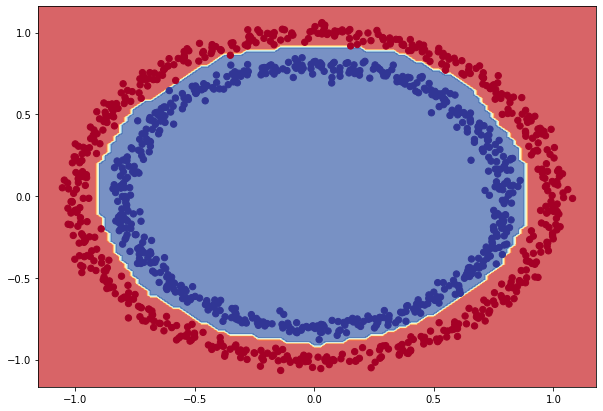

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_boundary(model_2, X, y)

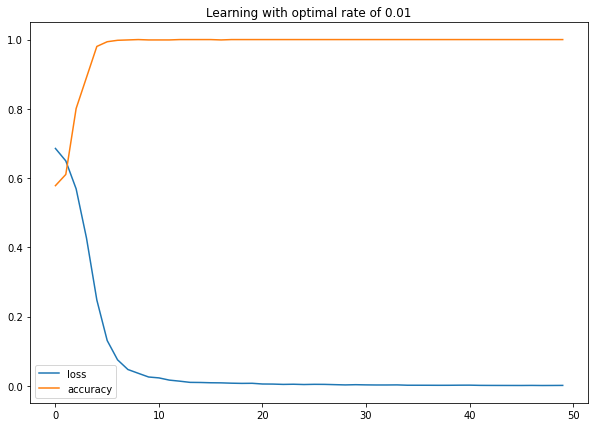

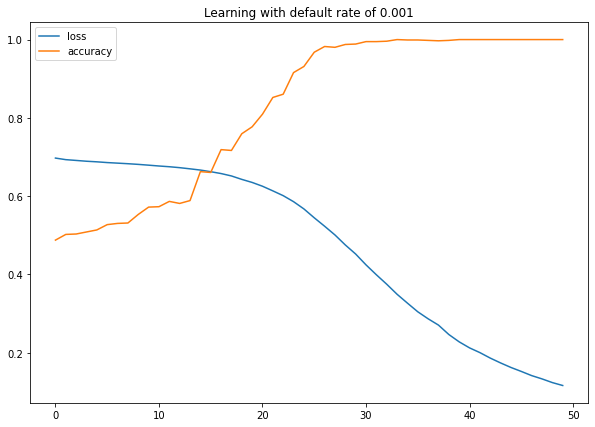

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))
plt.title("Learning with optimal rate of 0.01")
plt.show()

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Learning with default rate of 0.001")
plt.show()

Now I can easily deruce number of *epochs* to *10* to prevent **overfitting** and repeat model

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5781
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6104
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8010
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8906
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9802
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1308 - accuracy: 0.9937
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9979
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9990
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 1.0000


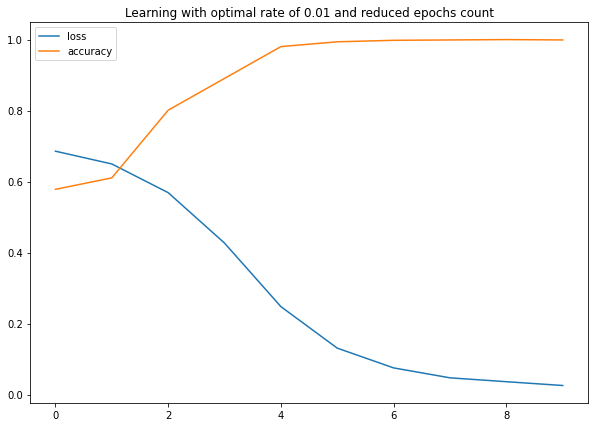

doing binary classifcation...


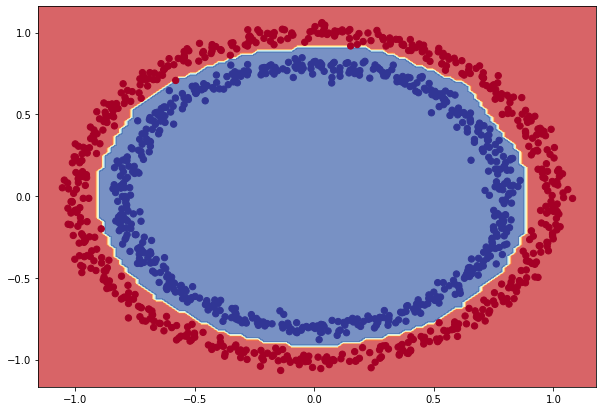

Model loss on the test set: 0.02698400430381298
Model accuracy on the test set: 100.00%


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                      
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=10, verbose=1)

loss, accuracy = model_3.evaluate(X_test, y_test)

pd.DataFrame(history_3.history).plot(figsize=(10,7))
plt.title("Learning with optimal rate of 0.01 and reduced epochs count")
plt.show()

plt.figure(figsize=(10,7))
plot_decision_boundary(model_3, X, y)
plt.show()

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

# Metrics
* Confusion matrix

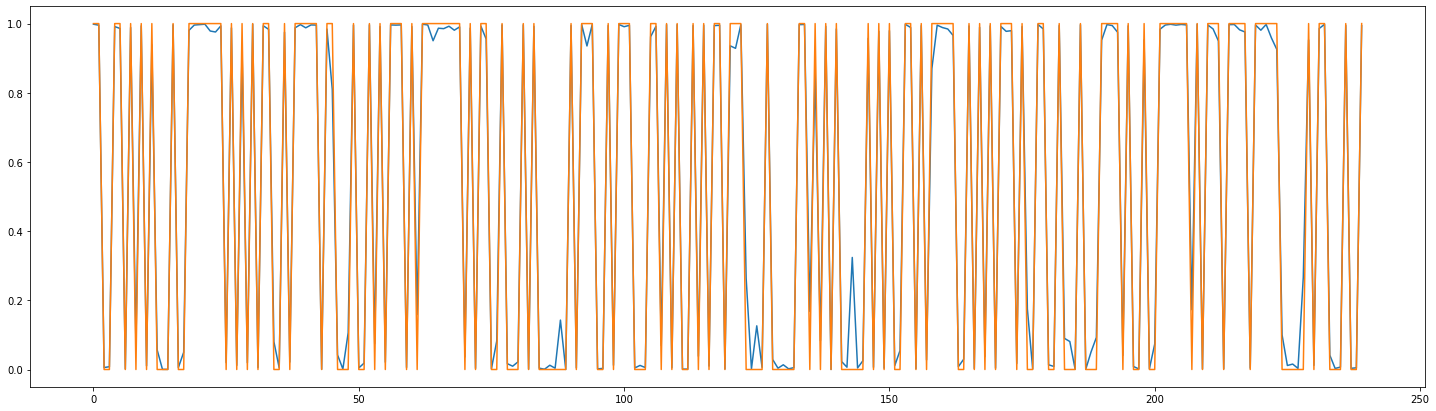

array([[114,   0],
       [  0, 126]])

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_3.predict(X_test)

plt.figure(figsize=(25,7))
plt.plot(y_preds)
plt.plot(y_test)
plt.show()

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

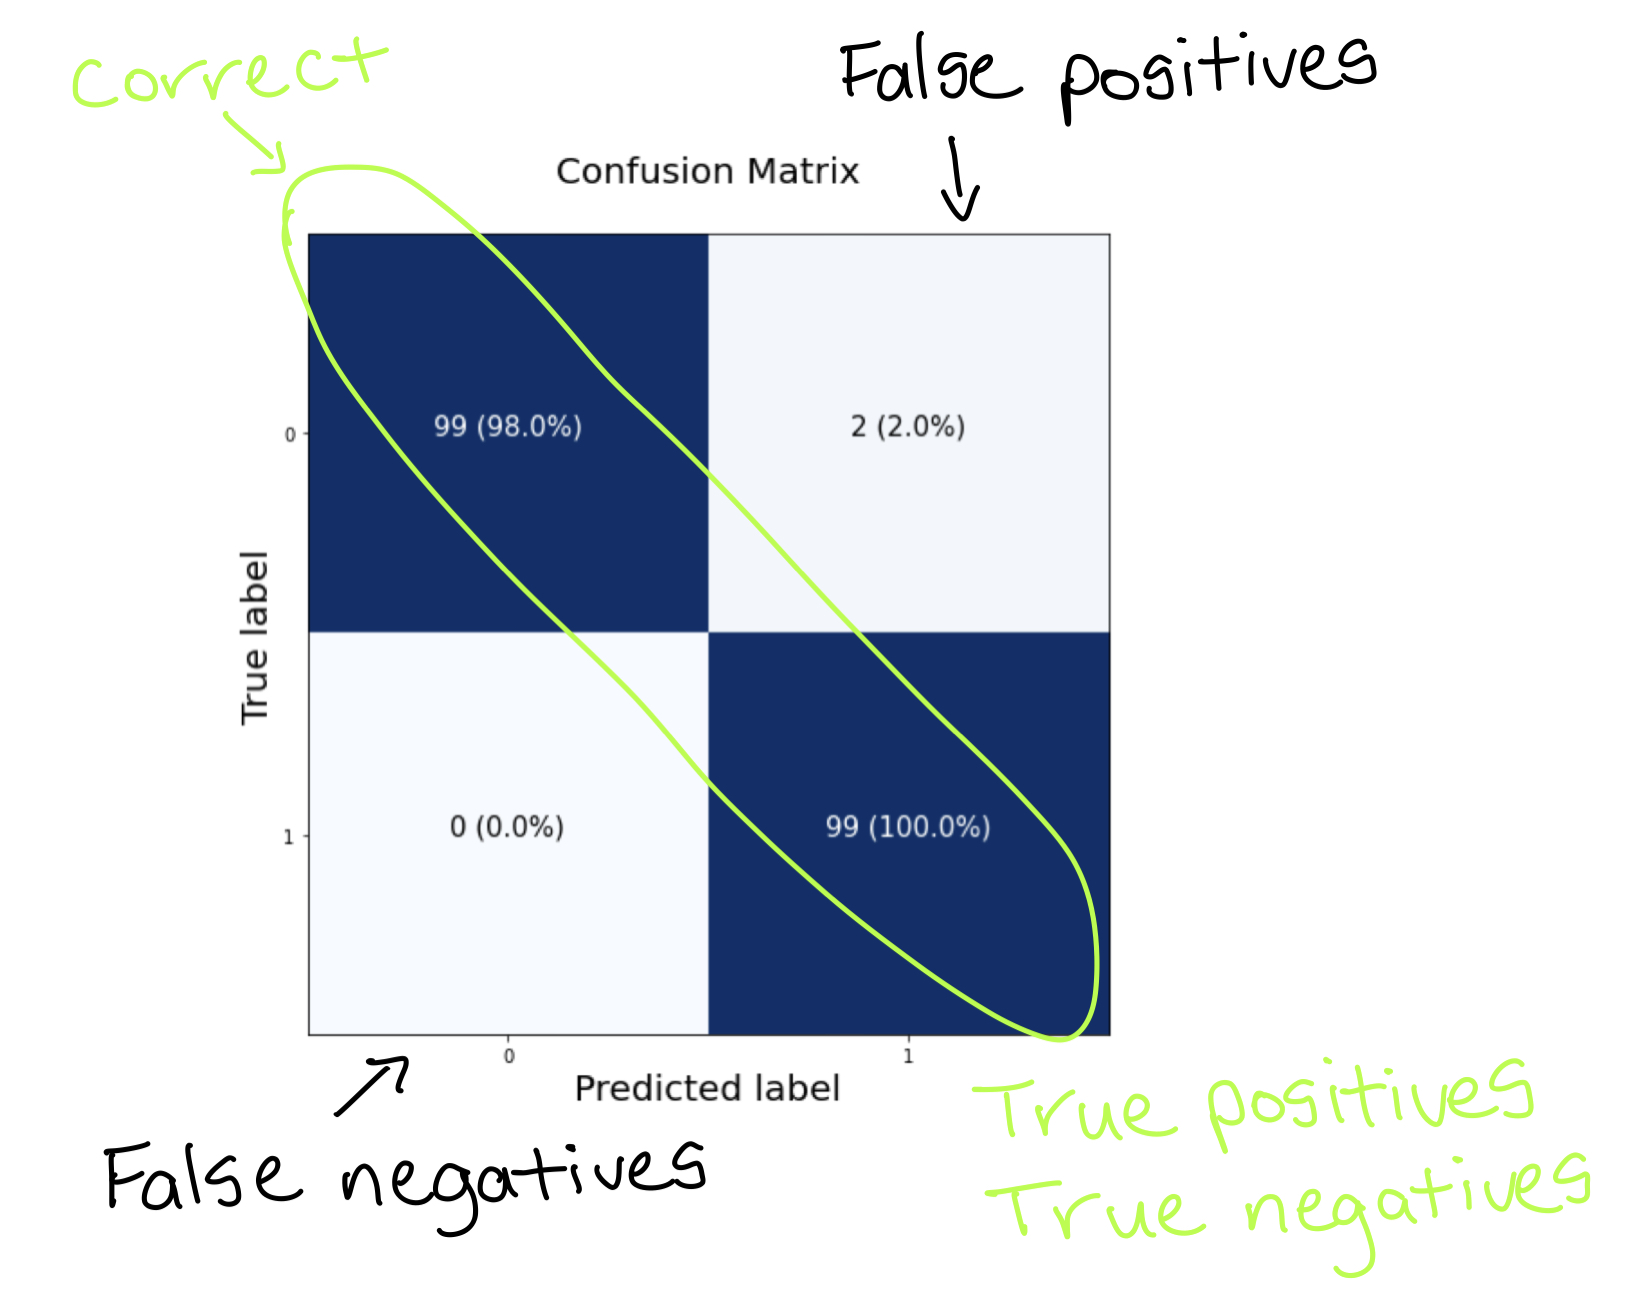

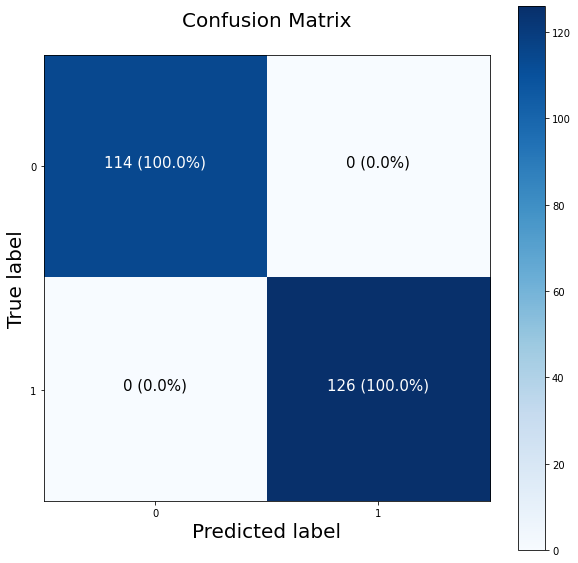

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multiclass classification - Larger Example

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist


# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

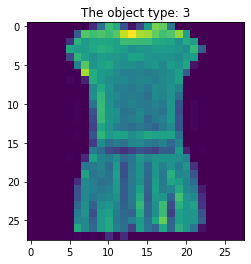

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt

plt.title(f"The object type: {train_labels[3]}")
plt.imshow(train_data[3]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Dress')

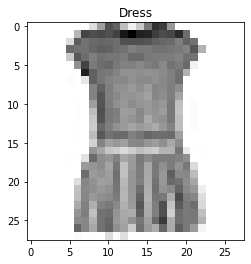

In [ ]:
plt.imshow(train_data[3], cmap=plt.cm.binary)
plt.title(class_names[train_labels[3]])

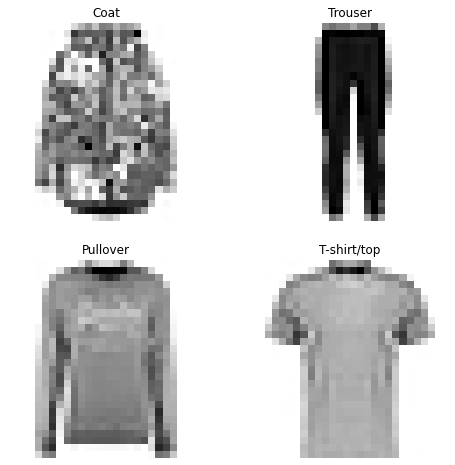

In [ ]:
import random
plt.figure(figsize=(8,8))

for i in range(4):
  rand_index = random.randrange(0, len(train_data))
  plt.subplot(2,2,i+1)
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Modeling

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
* Output layer activation = softmax (not sigmoid)

PS: `tf.keras.losses.CategoricalCrossentropy()` - for *one_hot*

  `tf.keras.losses.SparseCategoricalCrossentropy()` - for integers

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1799 - accuracy: 0.1597
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5742 - accuracy: 0.3204
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5730 - accuracy: 0.3239
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.5488 

<Figure size 504x504 with 0 Axes>

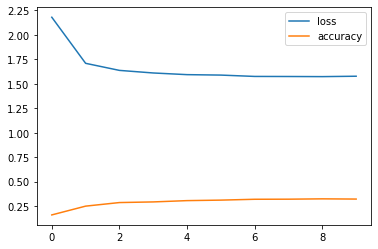

In [ ]:
# EXAMPLE WITH ONE_HOT and CategoricalCrossentropy()
train_hot = tf.one_hot(train_labels, len(class_names))
test_hot = tf.one_hot(test_labels, len(class_names))

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                    
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a model
model_4.compile(optimizer="Adam",
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit a model
bad_history = model_4.fit(x=train_data, 
                          y=train_hot, 
                          epochs=10)

# Evaluate a model
results = model_4.evaluate(test_data, 
                           test_hot)

print(results)

plt.figure(figsize=(7,7))
pd.DataFrame(bad_history.history).plot()

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1799 - accuracy: 0.1597
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5742 - accuracy: 0.3204
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5730 - accuracy: 0.3239
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.5488 

<Figure size 504x504 with 0 Axes>

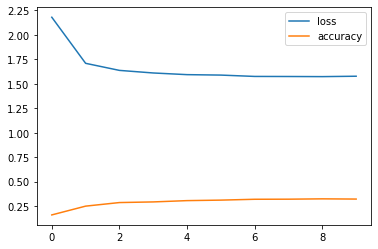

In [ ]:
# EXAMPLE WITH DIGITS and SparseCategoricalCrossentropy()

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                    
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a model
model_4.compile(optimizer="Adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit a model
bad_history = model_4.fit(x=train_data, 
                          y=train_labels, 
                          epochs=10)

# Evaluate a model
results = model_4.evaluate(test_data, 
                           test_labels)

print(results)

plt.figure(figsize=(7,7))
pd.DataFrame(bad_history.history).plot()

As we see, the results are pretty the same

# Improve model - Preprocessing

`tf.math.reduce_min(train_data)` == `train_data.min()`

In [ ]:
train_data = train_data - tf.math.reduce_min(train_data)
train_data = train_data / tf.math.reduce_max(train_data)

test_data = test_data - tf.math.reduce_min(test_data)
test_data = test_data / tf.math.reduce_max(test_data)

# Improving model - Validation

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<Figure size 504x504 with 0 Axes>

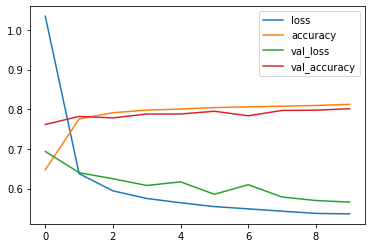

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                    
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a model
model_4.compile(optimizer="Adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit a model
good_history = model_4.fit(x=train_data, 
                          y=train_labels, 
                          epochs=10,
                          validation_data=(test_data, test_labels))

# Evaluate a model
results = model_4.evaluate(test_data, 
                           test_labels)

print(results)

plt.figure(figsize=(7,7))
pd.DataFrame(good_history.history).plot()

# Improving - Optimal learning rate

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7366 - lr: 1.5849e-04
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/100
1875/1875 [=====

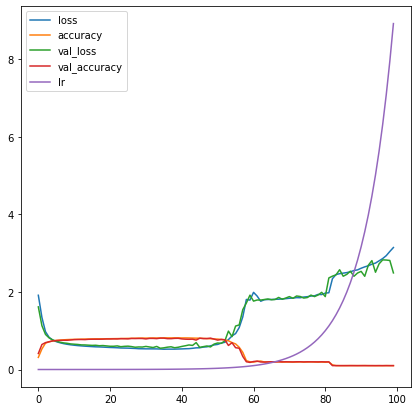

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                    
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a model
model_4.compile(optimizer="Adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Create callback to update learning rate
def upd_lrn(epoch):
  return 1e-4 * 10**(epoch/20)

callback_upd_lrn = tf.keras.callbacks.LearningRateScheduler(
    schedule=upd_lrn
)

# Fit a model
experiment_history = model_4.fit(x=train_data, 
                          y=train_labels, 
                          epochs=100,
                          validation_data=(test_data, test_labels),
                          callbacks=callback_upd_lrn,)

# Evaluate a model
results = model_4.evaluate(test_data, 
                           test_labels)

print(results)

pd.DataFrame(experiment_history.history).plot(figsize=(7,7))

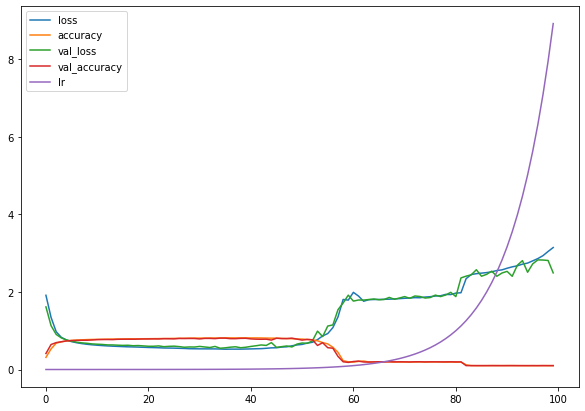

In [ ]:
pd.DataFrame(experiment_history.history).plot(figsize=(10,7))
plt.show()

0.0050118724


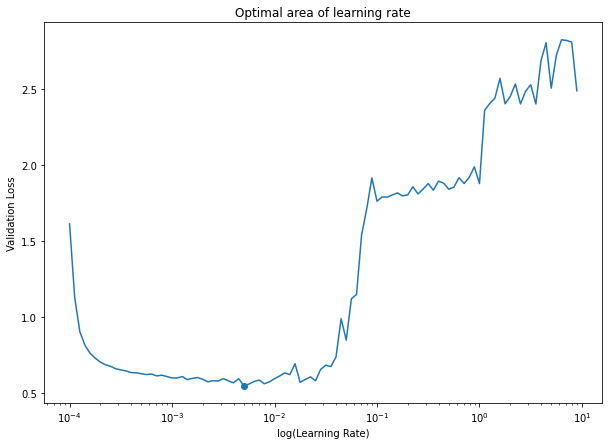

In [ ]:
import numpy as np
val = min(experiment_history.history['val_loss'])
max_lr = experiment_history.history['lr'][np.argmin(experiment_history.history['val_loss'])]
print(max_lr)

plt.figure(figsize=(10,7))
plt.plot(experiment_history.history['lr'], experiment_history.history['val_loss'])
plt.scatter(max_lr, val)
plt.xscale('log')
plt.xlabel('log(Learning Rate)')
plt.ylabel('Validation Loss')
plt.title('Optimal area of learning rate')
plt.show()

The optimal are is from 0.002 to 0.0002

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2561 - accuracy: 0.5576 - val_loss: 0.8142 - val_accuracy: 0.7211
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7263 - accuracy: 0.7481 - val_loss: 0.7238 - val_accuracy: 0.7520
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6636 - accuracy: 0.7660 - val_loss: 0.6766 - val_accuracy: 0.7625
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6351 - accuracy: 0.7734 - val_loss: 0.6566 - val_accuracy: 0.7681
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6187 - accuracy: 0.7772 - val_loss: 0.6404 - val_accuracy: 0.7730
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6072 - accuracy: 0.7814 - val_loss: 0.6385 - val_accuracy: 0.7748
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5994 - accuracy: 0.7842 - val_loss: 0.6380 - val_accuracy:

<Figure size 504x504 with 0 Axes>

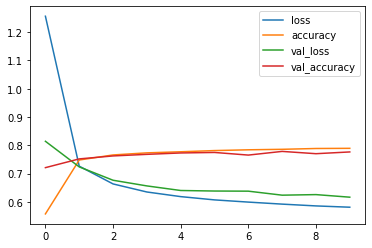

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                    
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# Fit a model
best_history = model_4.fit(x=train_data, 
                          y=train_labels, 
                          epochs=10,
                          validation_data=(test_data, test_labels))

# Evaluate a model
results = model_4.evaluate(test_data, 
                           test_labels)

print(results)

plt.figure(figsize=(7,7))
pd.DataFrame(best_history.history).plot()

Let's compare results

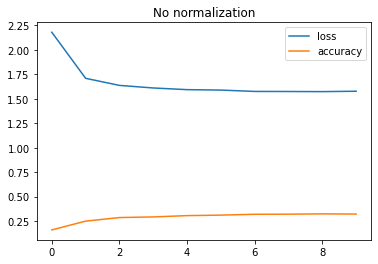

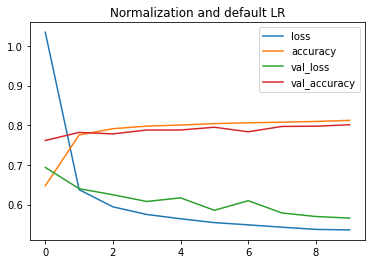

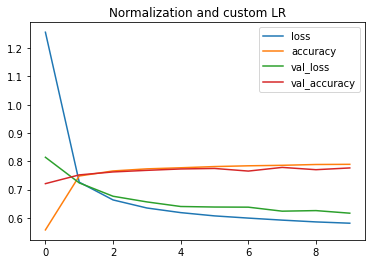

In [ ]:
pd.DataFrame(bad_history.history).plot(title="No normalization")
pd.DataFrame(good_history.history).plot(title="Normalization and default LR")
pd.DataFrame(best_history.history).plot(title="Normalization and custom LR")

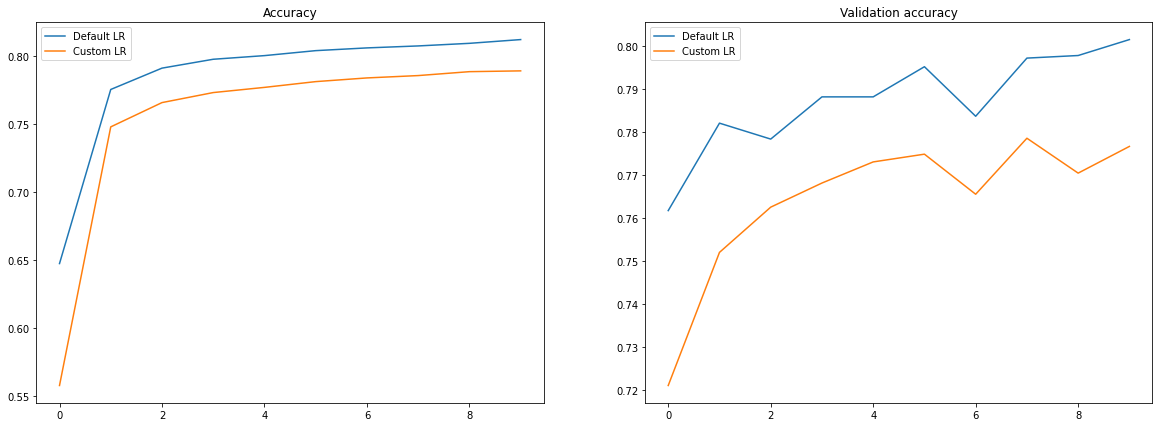

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(good_history.history["accuracy"], label="Default LR")
plt.plot(best_history.history["accuracy"], label="Custom LR")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(good_history.history["val_accuracy"], label="Default LR")
plt.plot(best_history.history["val_accuracy"], label="Custom LR")
plt.title("Validation accuracy")
plt.legend()
plt.show()

You can see, that there is no significant difference between models with default and custom learning rates. Also it is easy to mention, that default settings of learning rate suits most of the time

# Details about model

In [ ]:
model_4.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_107 (Dense)           (None, 4)                 3140      
                                                                 
 dense_108 (Dense)           (None, 4)                 20        
                                                                 
 dense_109 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


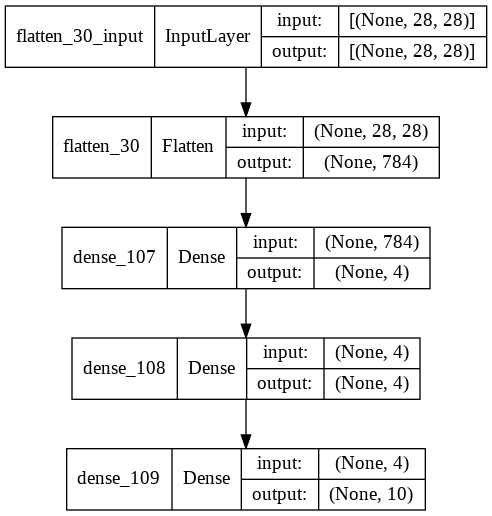

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)